In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json_tricks

answer = {}

## Task 1. Analytical integrals

Find formulae of integrals for the functions below from $1$ to $x$:

$\int_1^x f(x) dx$

In [5]:
def f1(x):
    return 3 * x**2

def f2(x):
    return 5*x**4 - 2*x**3 + x

def f3(x):
    return np.cos(x) ** 2 + 2 * np.sin(x) * np.cos(x)

def f4(x):
    return x * np.exp(x**2)

def f5(x):
    return x * np.log(x)

def f6(x):
    return x / (x**2 + 1)

def f7(x):
    return np.exp(x) * np.sin(x)

def f8(x):
    return np.exp(x) * x

def f9(x):
    return x ** 2 * np.log(x)

def f10(x):
    return np.sin(x) / (1 + np.cos(x))

In [6]:
def int_f1(x):
    res = x**3-1
    
    return res

def int_f2(x):
    res = x**5-x**4/2+x**2/2-(1)
  
    return res

def int_f3(x):
    res = np.sin(2*x)/4+x/2-np.cos(2*x)/2-(np.sin(2)/4-np.cos(2)/2+1/2)
    return res

def int_f4(x):
    res = 1/2*np.exp(x**2)-np.exp(1)/2
    return res

def int_f5(x):
    res = np.log(x)*x**2/2-x**2/4+1/4
    return res

def int_f6(x):
    res = 1/2*np.log((x**2+1)/2)
    return res

def int_f7(x):
    res = (np.exp(x) / 2) * (np.sin(x) - np.cos(x)) - (np.exp(1) / 2) * (np.sin(1) - np.cos(1))
    return res

def int_f8(x):
    res = x * np.exp(x) - np.exp(x)
    return res

def int_f9(x):
    res = x**3/3*np.log(x)-x**3/9+1/9
    return res

def int_f10(x):
    res = np.log((1 + np.cos(1)) / (1 + np.cos(x)))
    return res

In [7]:
fs = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]
int_fs = [int_f1, int_f2, int_f3, int_f4, int_f5, int_f6, int_f7, int_f8, int_f9, int_f10]

x = np.linspace(1, 5, 100)
answer['integrals'] = [int_f(x) for int_f in int_fs]

## Task 2. Rectangle approximation

Write a function that calculates approximate integral with $N$ eqidistant rectangles. Use middle point approximation for the best result.

In [8]:
def approx_int_squares(f, a, b, n):
    dx = (b - a) / n
    area = 0
    for i in range(1,n+1):
        mid_x = a + (i - 0.5) * dx
        area += f(mid_x) * dx
    return area


## Task 3. Trapezoid approximation

Write a function that calculates approximate integral with $N$ eqidistant trapezoids

In [9]:
def approx_int_trapezoids(f, a, b, n):
    dx = (b - a) / n
    area=0
    for i in range(n):
        area += f(a + i * dx)+f(a+(i+1)*dx)
    area *= dx/2

    return area

In [10]:
for x in np.linspace(1, 5):
    answer['squares'] = [approx_int_squares(f, 1, x, 10) for f in fs]
    answer['trapezoids'] = [approx_int_squares(f, 1, x, 10) for f in fs]

## Step 4: Visualization

First of all, there will be a vizualization of trapezoids and rectangles that are used to approximate the integrals.

=== 0
7
6.9975000000000005
7.005
===
=== 1
25.0
24.949181250000006
25.101650000000006
===
=== 2
0.20222341162483215
0.20172653768969406
0.20321666260934734
===
=== 3
25.939934102342594
25.740089695906782
26.340907912890124
===
=== 4
0.6362943611198906
0.6360056407612503
0.6368718797887363
===
=== 5
0.4581453659370775
0.45819519178593104
0.45804556496413174
===
=== 6
4.487560335402326
4.487604875539899
4.487469385297051
===
=== 7
7.38905609893065
7.38208818102075
7.402994649502211
===
=== 8
1.0706147037154097
1.0690426703317775
1.0737586664241394
===
=== 9
0.9700844598845829
0.9696421030382268
0.9709698445536845
===


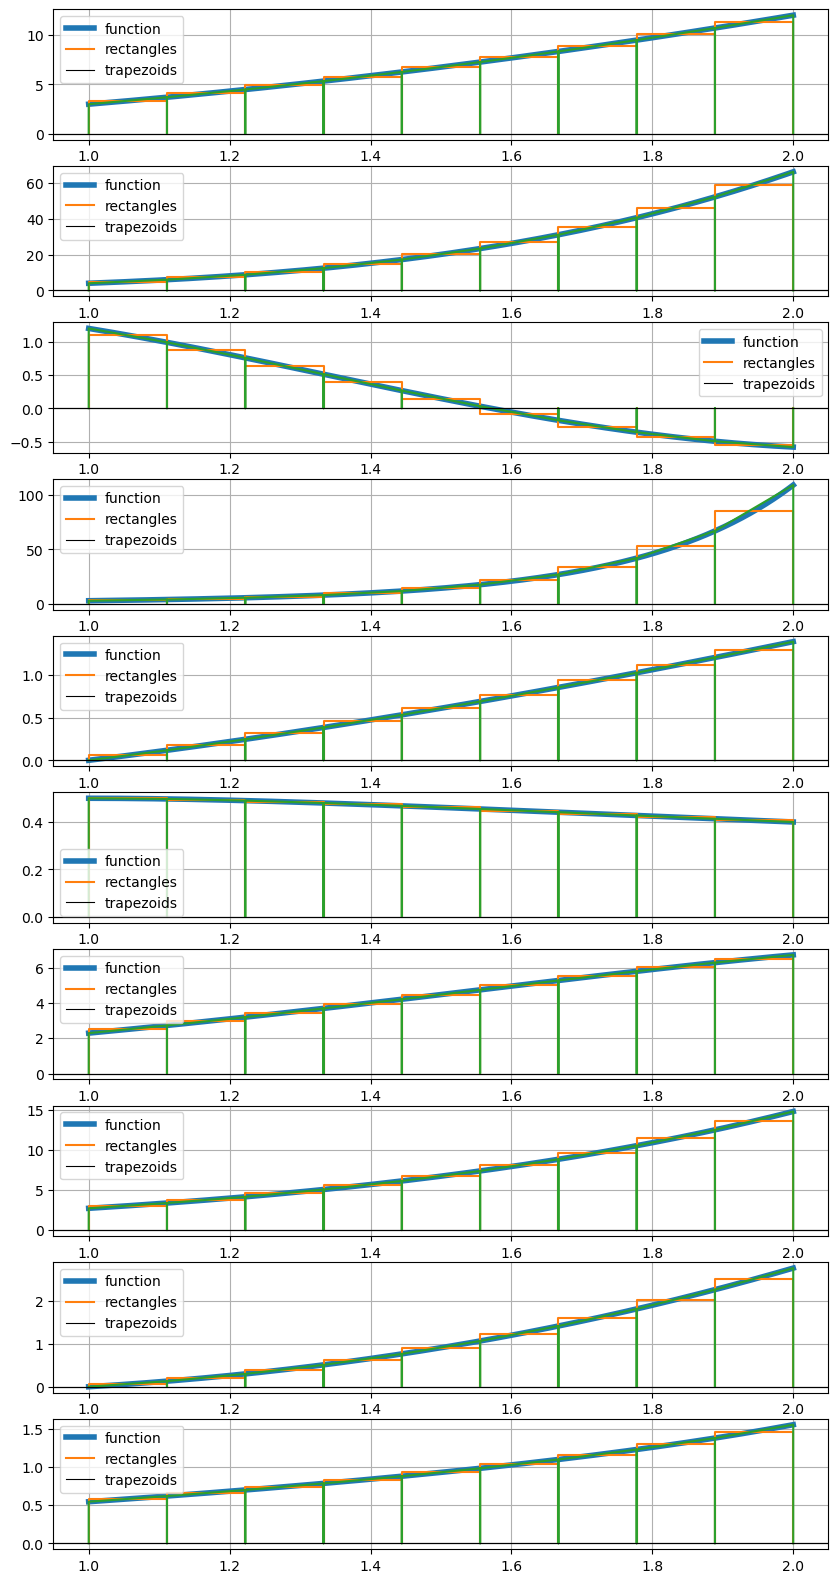

In [11]:
# You can change this N afterwards to check how good is the
# approximation and to check how the trapezoids and rectangles
# fill the area under the curve
N = 10
b = 2

plt.figure(figsize=(10, 20))
for index in range(len(fs)):
    print('===', str(index))
    f = fs[index]
    int_f = int_fs[index]
    plt.subplot(10, 1, index + 1)
    x = np.linspace(1, b, 1000)
    plt.plot(x, f(x), linewidth=4)

    x = np.linspace(1, b, N)
    squares_x = []
    squares_y = []
    for index in range(len(x) - 1):
        squares_x.extend([x[index], x[index], x[index + 1], x[index + 1]])
        squares_y.extend([0, f((x[index] + x[index + 1])/2), f((x[index] + x[index + 1])/2), 0])

    plt.plot(squares_x, squares_y)
    plt.grid()
    plt.axhline(0, color='black', linewidth=0.8)

    x = np.linspace(1, b, N)
    trapezoids_x = []
    trapezoids_y = []
    for index in range(len(x) - 1):
        trapezoids_x.extend([x[index], x[index], x[index + 1], x[index + 1]])
        trapezoids_y.extend([0, f(x[index]), f(x[index + 1]), 0])

    plt.plot(trapezoids_x, trapezoids_y)
    # plt.grid()
    plt.axhline(0, color='black', linewidth=0.8)
    plt.legend(['function', 'rectangles', 'trapezoids'])

    int_f_exact = int_f(2)
    int_f_squares = approx_int_squares(f, 1, 2, N)
    int_f_trapezoids = approx_int_trapezoids(f, 1, 2, N)

    
    print(int_f_exact)
    print(int_f_squares)
    print(int_f_trapezoids)
    print('===')


# Step 5:

Check yourself. 

With integrals it is very easy to check yourself whether you found an integral correctly. You only have to differentiate the integral function, and what you should get is the original function that you are integrating.

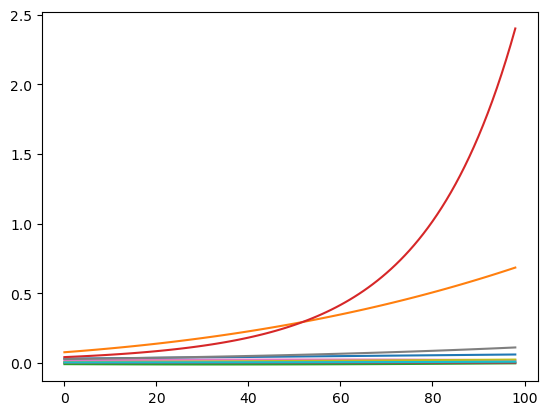

In [12]:
# Change the discretization to check whether the derivative converges to the original function
x = np.linspace(1, 2, 100)

for index in range(len(fs)):
    f = fs[index]
    int_f = int_fs[index]
    
    f_vals = f(x)
    int_f_vals = int_f(x)

    d_int_f_approx = (int_f_vals[1:] - int_f_vals[:-1]) / (x[1:] - x[:-1])

    plt.plot(d_int_f_approx - f_vals[:-1])


    


In [13]:
json_tricks.dump(answer, '.answer.json')

'{"integrals": [{"__ndarray__": [0.0, 0.12617553970477147, 0.2625417525937883, 0.40949439296546686, 0.5674292151182261, 0.7367419733504825, 0.9178284219606534, 1.111084315247156, 1.3169054075084072, 1.5356874530428257, 1.767826206148826, 2.0137174211248285, 2.273756852269249, 2.548340253880505, 2.8378633802570143, 3.1427219856971913, 3.46331182449946, 3.800028650962229, 4.153268219383921, 4.523426284062954, 4.910898599297743, 5.316080919386706, 5.739368998628257, 6.181158591320822, 6.641845451762808, 7.121825334252641, 7.621493993088729, 8.141247182569495, 8.681480656993362, 9.242590170658735, 9.824971477864036, 10.429020332907694, 11.055132490088113, 11.703703703703706, 12.375129728052897, 13.069806317434114, 13.788129226145756, 14.530494208486248, 15.297297018754016, 16.088933411247467, 16.905799140265014, 17.74828996010508, 18.616801625066092, 19.51172988944645, 20.433470507544577, 21.382419233658904, 22.35897182208784, 23.363524027129788, 24.396471603083175, 25.458210304246432, 26.